# Scikit-learn exercises

### 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [98]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [ ]:
# Run this to be able to load the dataset 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [25]:
# Load the data
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [27]:
mpg.info() #There are six observations with missing values for horsepower

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [28]:
mpg = mpg.dropna() # Since the missing values are a small part of the dataset I decide to drop them
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

In [29]:
mpg.drop(["cylinders", "model_year"], axis=1).describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


&nbsp; c) Make some plots on some of the columns that you find interesting.

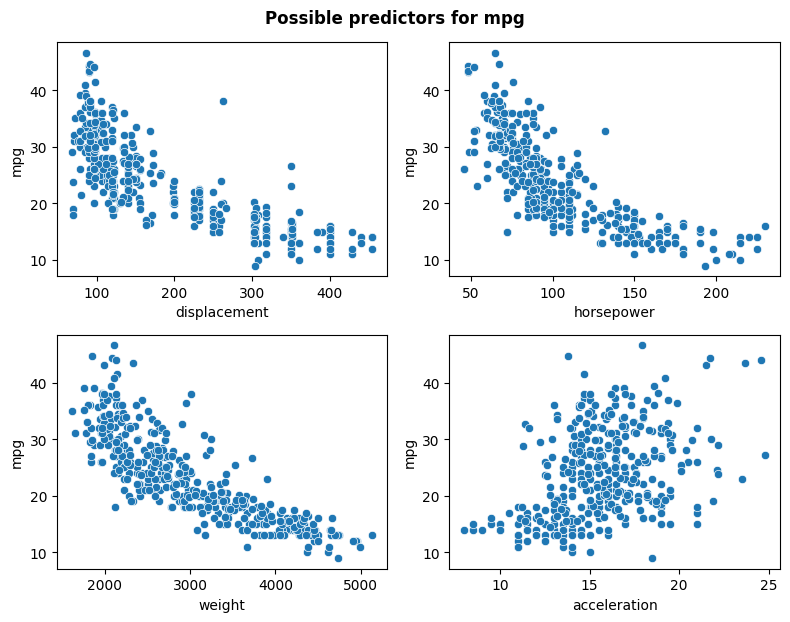

In [30]:
#Plotting the data

fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=100)

for ax, feature in zip(axes.flatten(), mpg.columns[2:6]):
  sns.scatterplot(data=mpg, x=feature, y="mpg", ax = ax)

fig.tight_layout()
_ = fig.suptitle("Possible predictors for mpg", y=1.03, fontweight="bold")

There seems to be a negative correlation between mpg and the predictors displacement, horsepower and weight and a weaker positive correlation with acceleration. However, the data does not look entirely linear, but rather polynomial.

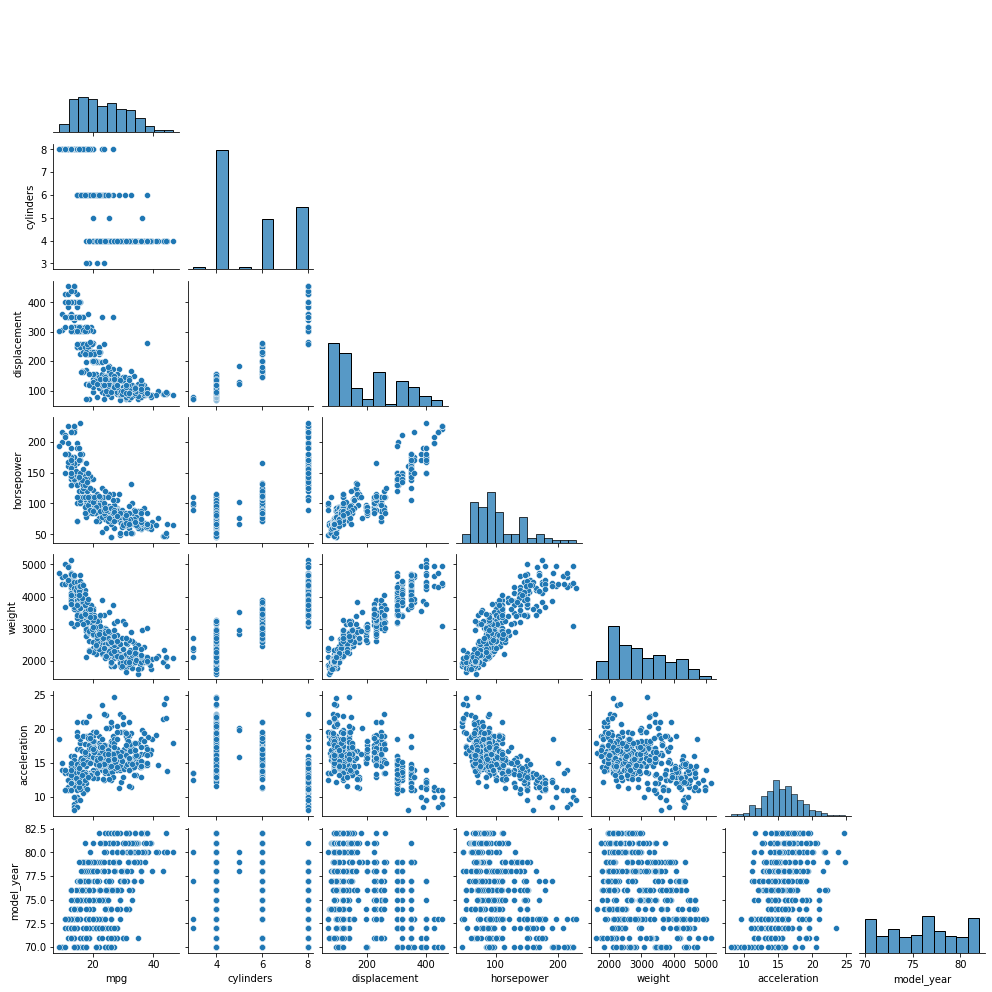

In [31]:
sns.pairplot(mpg, corner=True, height = 2)

Some of the predictors seems to be highly correlated with each other, which could be a problem for the model. We should later consider to drop some of them.

&nbsp; d) Check if there are any columns you might want to drop. 

In [32]:
mpg_reduced = mpg.drop(["origin", "name"], axis=1) # Remove the nominal variables
mpg_reduced.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

In [33]:
X_train, X_test, y_train, y_test = train_test_split(mpg_reduced.drop("mpg", axis=1), mpg_reduced["mpg"], test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 6)
(79, 6)
(313,)
(79,)


In [34]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
260,6,225.0,110.0,3620,18.7,78
184,4,140.0,92.0,2572,14.9,76
174,6,171.0,97.0,2984,14.5,75
64,8,318.0,150.0,4135,13.5,72
344,4,86.0,64.0,1875,16.4,81


In [35]:
y_train.head()

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
Name: mpg, dtype: float64

### 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

In [36]:
# Scaling the data (standardisation)
scaler = StandardScaler() # Instaniate a scaler object
scaler.fit(X_train) # Fit the X_train data

scaled_X_train = scaler.transform(X_train) # Scale the X_train data
scaled_X_test = scaler.transform(X_test) # Scale the X_test data (based on the fitted X_train)

model_SVD = LinearRegression() # Create a linear regression model

In [47]:
def get_evaluation_metrics(X_train, y_train, X_test, y_test, model):
    """
    Fits the data to the model and predicts mpg/y-values for X_test.
    Returns the mean absolute error (mae), mean squared error (mse) and root mean squared error (rmse).
    """

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_SVD = mean_absolute_error(y_test, y_pred)
    mse_SVD = mean_squared_error(y_test, y_pred)
    rmse_SVD = np.sqrt(mse_SVD)

    return mae_SVD, mse_SVD, rmse_SVD

In [38]:
# Computes mae, mse and rmse on the scaled data

mae_SVD_scaled, mse_SVD_scaled, rmse_SVD_scaled = get_evaluation_metrics(scaled_X_train, y_train, scaled_X_test, y_test, model_SVD)

print(f"MAE {mae_SVD_scaled:.2f}")
print(f"MSE {mse_SVD_scaled:.2f}")
print(f"RMSE {rmse_SVD_scaled:.2f}")

MAE 2.50
MSE 10.50
RMSE 3.24


### 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

In [39]:
# Computes mae, mse and rmse on the non scaled data 
# This gives the same result as when using the scaled data, since we us SVD (Singular Value Decomposition)

mae_SVD_non_scaled, mse_SVD_non_scaled, rmse_SVD_non_scaled = get_evaluation_metrics(X_train, y_train, X_test, y_test, model_SVD)
print(f"MAE {mae_SVD_non_scaled:.2f}")
print(f"MSE {mse_SVD_non_scaled:.2f}")
print(f"RMSE {rmse_SVD_non_scaled:.2f}")

MAE 2.50
MSE 10.50
RMSE 3.24


In [49]:
model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter=100000) 
mae_SGD, mse_SGD, rmse_SGD = get_evaluation_metrics(scaled_X_train, y_train, scaled_X_test, y_test, model_SGD)

print(f"MAE {mae_SGD:.2f}")
print(f"MSE {mse_SGD:.2f}")
print(f"RMSE {rmse_SGD:.2f}")

MAE 2.55
MSE 10.93
RMSE 3.31


In [41]:
def poly_transformation(X_train, X_test, degree):
    """
    PolynomialFeatures creates a feature matrix to represent the polynomial combinations.
    Fits and transforms the X_train and the X_test.
    """

    poly = PolynomialFeatures(degree = degree, include_bias=False)
    poly_features_x_train = poly.fit_transform(X_train.values) # .values picks out the values from the dataframe and discards column names

    poly_features_x_test = poly.transform(X_test.values)

    return poly_features_x_train, poly_features_x_test

In [42]:
# Evaluates polynomial regression for degrees 1, 2 and 3

model_for_poly = LinearRegression()

poly_features_x_train_deg1, poly_features_x_test_deg1 = poly_transformation(X_train, X_test, degree=1)
mae_poly_1, mse_poly_1, rmse_poly_1 = get_evaluation_metrics(poly_features_x_train_deg1, y_train.values, poly_features_x_test_deg1, y_test.values, model_for_poly)

poly_features_x_train_deg2, poly_features_x_test_deg2 = poly_transformation(X_train, X_test, degree=2)
mae_poly_2, mse_poly_2, rmse_poly_2 = get_evaluation_metrics(poly_features_x_train_deg2, y_train.values, poly_features_x_test_deg2, y_test.values, model_for_poly)

poly_features_x_train_deg3, poly_features_x_test_deg3 = poly_transformation(X_train, X_test, degree=3)
mae_poly_3, mse_poly_3, rmse_poly_3 = get_evaluation_metrics(poly_features_x_train_deg3, y_train.values, poly_features_x_test_deg3, y_test.values, model_for_poly)

In [43]:
# Creates dataframe with the evaluation results

rows = [[mae_SVD_non_scaled, mae_SVD_scaled, mae_SGD, mae_poly_1, mae_poly_2, mae_poly_3], 
        [mse_SVD_non_scaled, mse_SVD_scaled, mse_SGD, mse_poly_1, mse_poly_2, mse_poly_3], 
        [rmse_SVD_non_scaled, rmse_SVD_scaled, rmse_SGD, rmse_poly_1, rmse_poly_2, rmse_poly_3]]

model_evaluations = pd.DataFrame(rows, columns=["Linear regr. SVD", "Linear regr. SVD scaled", "Linear regr. SGD", "Polynom. regr. deg 1", "Polynom. regr. deg 2", "Polynom. regr. deg 3"])

model_evaluations.rename(index={0 : "mae", 1 : "mse", 2 : "rmse"}, inplace=True)

In [44]:
model_evaluations

,Linear regr. SVD,Linear regr. SVD scaled,Linear regr. SGD,Polynom. regr. deg 1,Polynom. regr. deg 2,Polynom. regr. deg 3
mae,2.503860,2.503860,2.547103,2.503860,1.980477,2.117884
mse,10.502370,10.502370,10.958399,10.502370,7.419858,9.273545
rmse,3.240736,3.240736,3.310347,3.240736,2.723942,3.045250


Polynomial regression, degree 2, performed best.

### 4. Further explorations (**)

Feel free to further explore the dataset, for example you could choose to 
- drop different columns
- find out feature importance in polynomial models
- fine tune further for a specific model by exploring hyperparameters (check documentation which type of parameters that can be changed)

In [45]:
#Checking correlations
mpg_reduced.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [147]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(mpg_reduced[["weight", "acceleration", "model_year"]],  mpg_reduced["mpg"], test_size=0.2, random_state=42)

model_reduced = LinearRegression()
poly_features_x_train, poly_features_x_test = poly_transformation(X_train_reduced, X_test_reduced, degree=3)
mae_poly_reduced, mse_poly_reduced, rmse_poly_reduced = get_evaluation_metrics(poly_features_x_train, y_train_reduced.values, poly_features_x_test, y_test_reduced.values, model_reduced)

mae_poly_reduced, mse_poly_reduced, rmse_poly_reduced

(1.7205869761018806, 5.417855092426879, 2.3276286414346425)

In [141]:
mae = 0
mse = 0
rmse = 0

for i in range(500):
    X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(mpg_reduced[["weight", "acceleration", "model_year"]],  mpg_reduced["mpg"], test_size=0.2)

    model_reduced = LinearRegression()
    poly_features_x_train, poly_features_x_test = poly_transformation(X_train_reduced, X_test_reduced, degree=3)
    mae_poly_reduced, mse_poly_reduced, rmse_poly_reduced = get_evaluation_metrics(poly_features_x_train, y_train_reduced.values, poly_features_x_test, y_test_reduced.values, model_reduced)

    mae += mae_poly_reduced
    mse += mse_poly_reduced
    rmse += rmse_poly_reduced

print(mae/500)
print(mse/500)
print(rmse/500)

2.0514786614791856
7.842343734697885
2.783824651631353


I tried out some different models. I started with adding weight as a predictor, since weight had the heighest correlation with mpg. Weight, horsepower and displacement are all highly correlated with each other and multicollinearity is a potenital problem for the model. I therefore only included weight. Both model_year and acceleration improved the model (and they did not correlate to any greater extent with each other). Adding cylinders did not improve the model.